# Description

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

# Dataset
In this homework, we will use the California Housing Prices from Kaggle.

Here's a wget-able link:
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

# EDA
- Load the data.
- Look at the median_house_value variable. Does it have a long tail?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [2]:
df = pd.read_csv('/home/timur/work_hub/ml_zoomcamp2023/2. Machine Learning for Regression/housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### Does median_house_value variable has long tail? I think YES

<Axes: xlabel='median_house_value', ylabel='Count'>

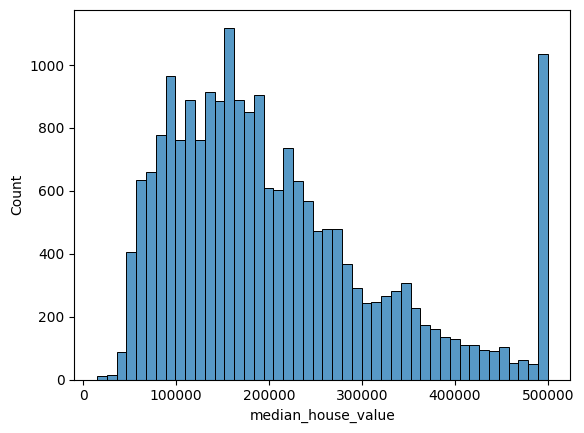

In [5]:
sns.histplot(df['median_house_value'])

## Preparing the dataset

For this homework, we only want to use a subset of data.

- First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

- Next, use only the following columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'

In [8]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [115]:
ndf = df.query('ocean_proximity == "<1H OCEAN" or ocean_proximity == "INLAND"')
ndf

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [117]:
feature = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

In [118]:
ndf = ndf[feature ]
ndf 

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


## Question 1
There's one feature with missing values. What is it?

- total_rooms
- total_bedrooms
- population
- households

In [119]:
ndf.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Answer:

- total_bedrooms

## Question 2
What's the median (50% percentile) for variable 'population'?

- 995
- 1095
- 1195
- 1295

In [120]:
ndf['population'].describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

## Answer: 

- 1195

## Prepare and split the dataset

- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [121]:
n = len(ndf)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test


print(n_val, n_test, n_train)

3137 3137 9413


#### Shuffly the dataset

In [122]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 15684, 15685, 15686])

In [32]:
np.random.seed(42)
np.random.shuffle(idx)

In [33]:
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

#### Split data in train/val/test sets, with 60%/20%/20% distribution.

In [38]:
df_train = ndf.iloc[idx[:n_train]]
df_val = ndf.iloc[idx[n_train:n_train + n_val]]
df_test = ndf.iloc[idx[n_train + n_val:]]

In [42]:
len(df_train), len(df_val) + len(df_test)

(9413, 6274)

In [43]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0
...,...,...,...,...,...,...,...,...,...
20157,34.44,-119.15,33.0,2005.0,392.0,1043.0,351.0,5.3080,297900.0
20005,36.13,-119.13,28.0,1673.0,385.0,1434.0,371.0,2.0586,40900.0
6691,34.13,-118.08,46.0,1238.0,147.0,377.0,145.0,8.4546,500001.0
3470,34.29,-118.46,24.0,3668.0,890.0,3151.0,810.0,3.0526,183300.0


Reset indexes in our datasets

In [46]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [48]:
df_test

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,33.90,-117.44,23.0,4487.0,754.0,2609.0,778.0,4.2788,148700.0
1,38.03,-121.65,28.0,3144.0,694.0,1095.0,482.0,3.4402,192400.0
2,37.25,-121.85,20.0,3773.0,624.0,1965.0,607.0,5.4939,241200.0
3,32.78,-116.97,35.0,1113.0,236.0,681.0,246.0,2.9784,136400.0
4,37.97,-121.32,43.0,2453.0,490.0,1093.0,438.0,2.9107,88800.0
...,...,...,...,...,...,...,...,...,...
3132,34.15,-118.14,41.0,1256.0,407.0,855.0,383.0,1.9923,500001.0
3133,37.40,-121.86,19.0,4043.0,764.0,2196.0,708.0,6.1504,268400.0
3134,34.07,-118.15,52.0,1983.0,344.0,887.0,331.0,3.2875,234400.0
3135,36.78,-119.81,37.0,1965.0,364.0,796.0,335.0,3.6250,83400.0


#### Apply the log transformation to the median_house_value variable using the np.log1p() function. I immediately create array and assign values into y variable.

In [53]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

We assign our log transform median_house_value column value to y_train, y_val, y_test. So we have to delete this column from df_train, df_val, df_test because we can accidentally use it in future

In [54]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [55]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306


## Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?


Options:

- With 0
- With mean
- Both are equally good

In [62]:
df_train.isna().sum()

latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        94
population             0
households             0
median_income          0
dtype: int64

#### 1.Fill missing values with 0

In [63]:
df_train = df_train.fillna(0)
df_train.isna().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [65]:
df_val = df_val.fillna(0)
df_val.isna().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

Prepare X

In [68]:
X_train = df_train.values
X_train

array([[ 3.6230e+01, -1.1914e+02,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [ 3.4120e+01, -1.1779e+02,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [ 3.3680e+01, -1.1797e+02,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [ 3.4130e+01, -1.1808e+02,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [ 3.4290e+01, -1.1846e+02,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [ 3.4000e+01, -1.1841e+02,  1.8000e+01, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

In [67]:
X_val = df_val.values
X_val

array([[  37.02  , -120.09  ,    9.    , ..., 1057.    ,  295.    ,
           3.7143],
       [  33.84  , -117.88  ,   34.    , ...,  837.    ,  240.    ,
           6.1168],
       [  33.95  , -118.21  ,   32.    , ..., 1265.    ,  302.    ,
           2.295 ],
       ...,
       [  34.    , -118.04  ,   30.    , ..., 2114.    ,  838.    ,
           5.1985],
       [  34.1   , -118.15  ,   36.    , ..., 2277.    ,  828.    ,
           3.1211],
       [  34.09  , -117.71  ,   36.    , ..., 1385.    ,  483.    ,
           4.1739]])

Train Linear Regression model

In [70]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

RMSE function

In [71]:
def rmse(y, y_pred): 
    error = y_pred - y 
    mse = (error ** 2).mean()
    return np.sqrt(mse)

Prediction

In [72]:
w0, w = train_linear_regression(X_train, y_train)
y_pred_val = w0 + X_val.dot(w)

Get RMSE score

In [73]:
np.round(rmse(y_val, y_pred_val), 2)

0.34

#### 2.Fill missing values with mean values

In [77]:
mean = df_train.total_bedrooms.mean()
mean

537.1349197917773

In [76]:
mean

537.1349197917773

In [78]:
df_train = df_train.fillna(mean)
df_train.isna().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [89]:
df_val = df_val.fillna(mean)
df_val.isna().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [90]:
X_train = df_train.values
X_train

array([[ 3.6230e+01, -1.1914e+02,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [ 3.4120e+01, -1.1779e+02,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [ 3.3680e+01, -1.1797e+02,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [ 3.4130e+01, -1.1808e+02,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [ 3.4290e+01, -1.1846e+02,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [ 3.4000e+01, -1.1841e+02,  1.8000e+01, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

In [91]:
X_val = df_val.values
X_val

array([[  37.02  , -120.09  ,    9.    , ..., 1057.    ,  295.    ,
           3.7143],
       [  33.84  , -117.88  ,   34.    , ...,  837.    ,  240.    ,
           6.1168],
       [  33.95  , -118.21  ,   32.    , ..., 1265.    ,  302.    ,
           2.295 ],
       ...,
       [  34.    , -118.04  ,   30.    , ..., 2114.    ,  838.    ,
           5.1985],
       [  34.1   , -118.15  ,   36.    , ..., 2277.    ,  828.    ,
           3.1211],
       [  34.09  , -117.71  ,   36.    , ..., 1385.    ,  483.    ,
           4.1739]])

Prediction

In [92]:
w0, w = train_linear_regression(X_train, y_train)
y_pred_val = w0 + X_val.dot(w)

Get RMSE score

In [93]:
np.round(rmse(y_val, y_pred_val), 2)

0.34

## Answer:
- Both are equally good

## Question 4

Now let's train a regularized linear regression.

- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
- If there are multiple options, select the smallest r.

Options:

- 0
- 0.000001
- 0.001
- 0.0001

Function for training linear regression with regularization parameter r

In [85]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

Inspecting the results with different r-parameter

In [86]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_reg_val = w0 + X_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_reg_val), 2)
    print(r, w0, rmse_val)

0 -9.763249477871977 0.34
1e-06 -9.76322883075981 0.34
0.0001 -9.7611852356339 0.34
0.001 -9.742646249295264 0.34
0.01 -9.561056193290652 0.34
0.1 -8.058889769411094 0.34
1 -3.133154278318269 0.34
5 -0.8410867975048296 0.35
10 -0.4381172315893463 0.35


It's seems that our RMSE quite equal. So we have to chose the smallest r-parameter = 0

## Answer:

- 0

## Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))


What's the value of std?

- 0.5
- 0.05
- 0.005
- 0.0005

In [123]:
ndf.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [124]:
n = len(ndf)
n_val = int(len(ndf)*0.2)
n_test = int(len(ndf)*0.2)
n_train = n - n_val - n_test

In [125]:
n_train, n_val, n_test

(9413, 3137, 3137)

Our model

In [130]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [135]:
rmse_list = []
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for i in seeds:
    idx = np.arange(n)
    np.random.seed(i)
    np.random.shuffle(idx)
    
    # shuffle df
    ndf = ndf.iloc[idx]
    
    # split df into train, validation and test df
    df_train = ndf.iloc[:n_train].copy()
    df_val = ndf.iloc[n_train:n_train + n_val].copy()
    df_test = ndf.iloc[n_train + n_val:].copy()
    
    # reset indexes
    df_train = df_train.reset_index(drop = True)
    df_val = df_val.reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)
    
    # create target variables (y)
    y_train = df_train.median_house_value.values
    y_val = df_val.median_house_value.values
    y_test = df_test.median_house_value.values
    
    # log transformation
    y_train = np.log1p(y_train)
    y_val = np.log1p(y_val)
    y_test = np.log1p(y_test)
    
    # delete our y-target from datasets
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    # prepare x_train, filling the value by 0, train our model
    X_train = df_train.fillna(0)
    X_train = X_train.values
    w_0, w = train_linear_regression(X_train, y_train)
    
    # prepare x_val df, calculate target
    X_val = df_val.fillna(0)
    X_val = X_val.values
    y_pred = w_0 + X_val.dot(w)
    
    # calculate RMSE 
    rmse_val = np.round(rmse(y_val, y_pred),2)
    
    rmse_list.append(rmse_val)
    
    print(w_0, rmse_val)

-10.566137397318522 0.35
-9.99823985110178 0.35
-9.826032826456021 0.34
-9.812229401335674 0.34
-9.927209089225032 0.34
-10.33699341068323 0.34
-9.817569581215997 0.34
-10.196385617080258 0.35
-9.893721316416805 0.35
-10.176289702881796 0.34


In [136]:
np.round(np.std(rmse_list),3)

0.005

## Answer: 

- 0.005

## Question 6


- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?


Options:

- 0.13
- 0.23
- 0.33
- 0.43

LinReg model with Regularization

In [138]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

RMSE function

In [167]:
def rse(y, y_pred): 
    error = y_pred - y 
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [175]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

# shuffle df
ndf = ndf.iloc[idx]

# split df into train, validation and test df
df_train = ndf.iloc[:n_train].copy()
df_val = ndf.iloc[n_train:n_train + n_val].copy()
df_test = ndf.iloc[n_train + n_val:].copy()

# concat df_train and df_val
frames = [df_train, df_val]
df_train = pd.concat(frames)

# reset indexes
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

# create target variables (y)
y_train = df_train.median_house_value.values
y_test = df_test.median_house_value.values

# log transformation
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

# delete our y-target from datasets
del df_train['median_house_value']
del df_test['median_house_value']


In [176]:
# prepare x_train, filling the value by 0, train our model
X_train = df_train.fillna(0)
X_train = X_train.values
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

# prepare x_test df, calculate target
X_test = df_test.fillna(0)
X_test = X_test.values
y_pred = w_0 + X_test.dot(w)

# calculate RMSE 
rmse = np.round(rse(y_test, y_pred),2)
rmse

0.34

## Answer: 

- 0.33